# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
totals = data.groupby('ItemType').agg('sum')[['RetailSales','RetailTransfers','WarehouseSales']]

totals

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


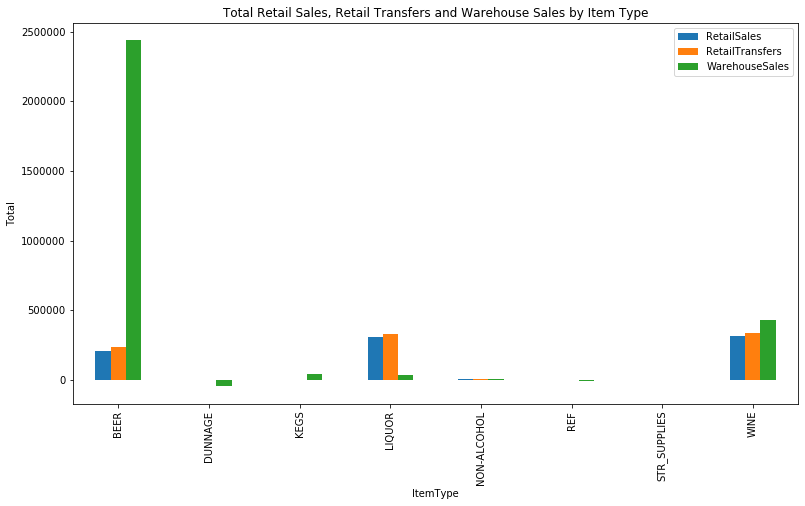

In [11]:
totals.plot(kind='bar', figsize=(13,7))
plt.title('Total Retail Sales, Retail Transfers and Warehouse Sales by Item Type', fontweight=500)
plt.ylabel('Total')
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [5]:
#Creating groupby subset, grouping by Suppliers
top_suppliers = data.groupby('Supplier').agg('sum')[['RetailSales','RetailTransfers','WarehouseSales']]

#Creating new Total Sales colum summing up all 3 Sales categories
top_suppliers['total_sales'] = top_suppliers.sum(axis=1)

top_suppliers

,RetailSales,RetailTransfers,WarehouseSales,total_sales
Supplier,,,,
8 VINI INC,2.78,2.00,1.00,5.78
A HARDY USA LTD,0.40,0.00,0.00,0.40
A I G WINE & SPIRITS,12.52,5.92,134.00,152.44
A VINTNERS SELECTIONS,8640.57,8361.10,29776.67,46778.34
A&E INC,11.52,2.00,0.00,13.52
...,...,...,...,...
WINEBOW INC,1.24,-1.58,0.00,-0.34
YOUNG WON TRADING INC,1058.65,1047.40,2528.90,4634.95
YUENGLING BREWERY,9628.35,10851.17,53805.32,74284.84


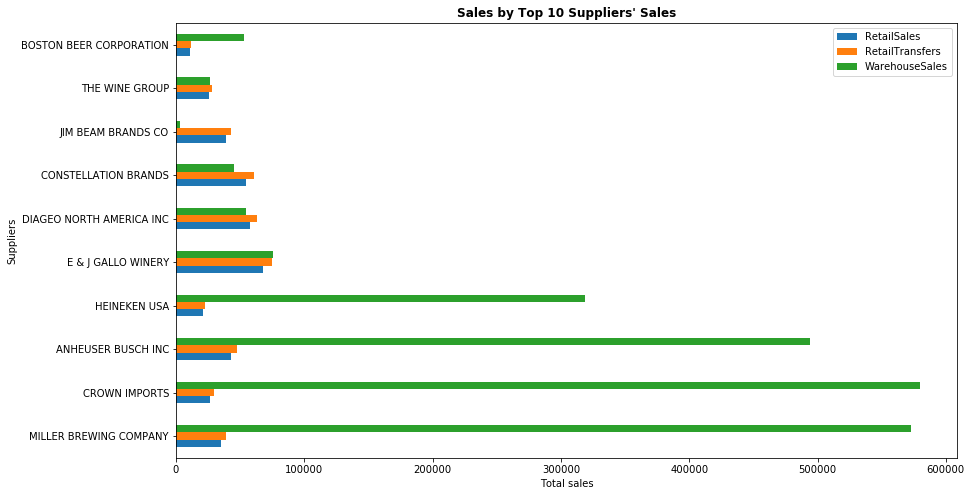

In [6]:
#Selecting top 10 suppliers
top_suppliers.nlargest(10,columns='total_sales')[['RetailSales','RetailTransfers','WarehouseSales']].plot(figsize=(14,8), 
                                                                                                          kind='barh')
plt.title("Sales by Top 10 Suppliers' Sales", fontweight=500)
plt.xlabel('Total sales')
plt.ylabel('Suppliers')
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [7]:
month_avg_sales = data.groupby(['Year', 'Month']).agg('mean')[['RetailSales', 'RetailTransfers', 'WarehouseSales']]

month_avg_sales.head()

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909

In [8]:
# With multindexing from the groupby subset, doing straight plotting would creat funky xticks
# Creating ad hoc xticks through list comprehension to isolate Month & Year from Groupby
# Multindexing might be considered a dict with a Year, Month key,value pair
# Where index[1] = Month & index[0] = Year

xticks = [f"{index[1]}\n{index[0]}" for index in data.groupby(['Year', 'Month']).groups.keys()]

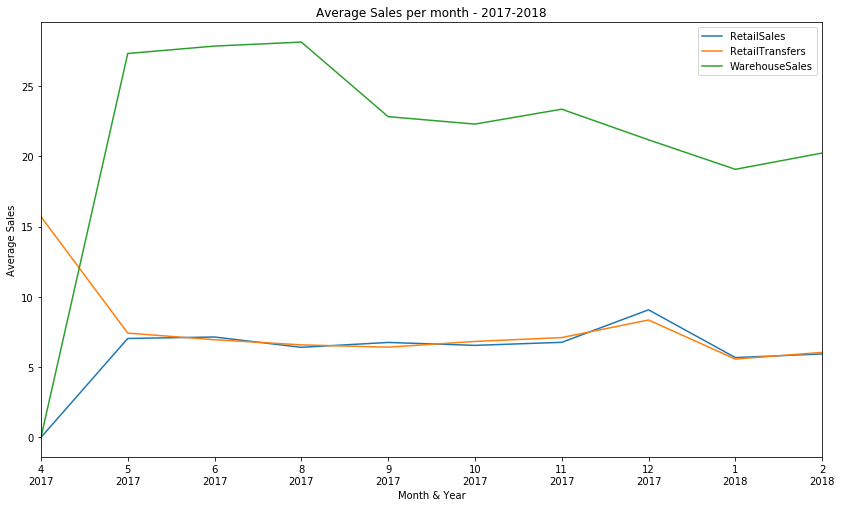

In [13]:
month_avg_sales.plot(kind='line', figsize=(14,8))
plt.xticks(ticks=range(len(xticks)), labels=xticks)

plt.title('Average Sales per month - 2017-2018', fontweight=500)
plt.ylabel('Average Sales')
plt.xlabel('Month & Year')
plt.show()

## 4. Plot the same information as above but as a bar chart.

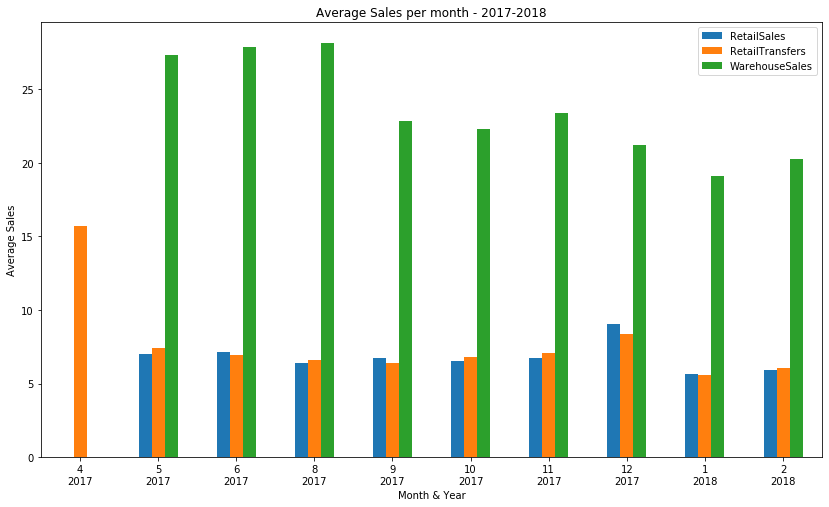

In [14]:
month_avg_sales.plot(kind='bar', figsize=(14,8))
plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=0)

plt.title('Average Sales per month - 2017-2018', fontweight=500)
plt.ylabel('Average Sales')
plt.xlabel('Month & Year')
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

 Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time

In [35]:
# Pivoting table on Item columns & Time index
item_retail_sales = pd.pivot_table(data=data,
                      values='RetailSales',
                      index=['Year', 'Month'],
                      columns='ItemType',
                      aggfunc=sum,
                      fill_value=0)

item_retail_sales

ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF  \
Year Month                                                          
2017 4          0.00        0     0      0.00         0.00   0.00   
     5      25023.24        0     0  35123.36         0.00   0.00   
     6      27863.26        0     0  35035.31      1209.23  30.60   
     8      23030.13        0     0  32186.04      1091.28  19.54   
     9      23852.76        0     0  32532.32       997.11  38.88   
     10     22583.78        0     0  32491.59       945.63  22.82   
     11     23341.14        0     0  35524.77      1005.19  63.11   
     12     28822.16        0     0  49522.28      1316.44  41.21   
2018 1      16606.33        0     0  28579.87       732.25  23.66   
     2      18640.31        0     0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5              0.00  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

In [53]:
# recreating the xticks - just for the sake of practicing list comprehension
xticks = [f"{index[1]}\n{index[0]}" for index in data.groupby(['Year', 'Month']).groups.keys()]

xticks

['4\n2017',
 '5\n2017',
 '6\n2017',
 '8\n2017',
 '9\n2017',
 '10\n2017',
 '11\n2017',
 '12\n2017',
 '1\n2018',
 '2\n2018']

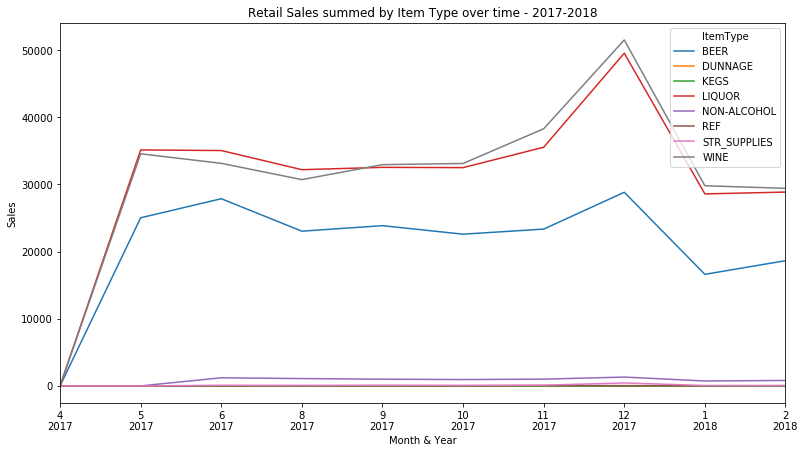

In [55]:
item_retail_sales.plot(kind='line', figsize=(13,7))

plt.xticks(ticks=range(len(xticks)), labels=xticks)
plt.title('Retail Sales summed by Item Type over time - 2017-2018', fontweight=500)
plt.ylabel('Sales')
plt.xlabel('Month & Year')
plt.show()

## 6. Plot the same information as above but as a bar chart.

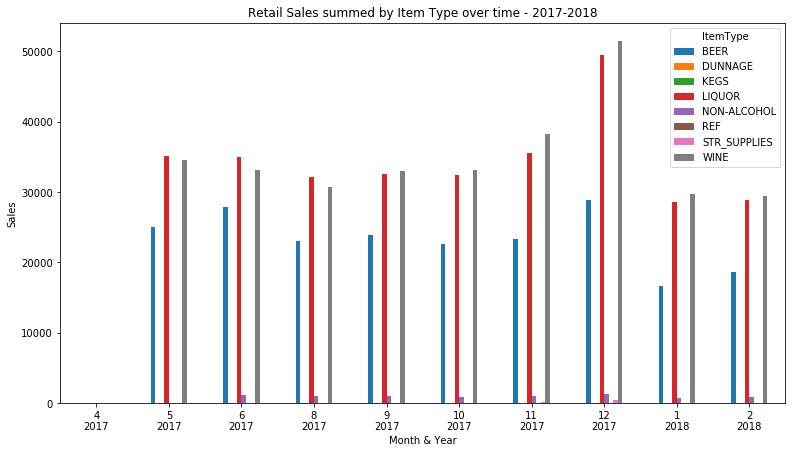

In [59]:
item_retail_sales.plot(kind='bar', figsize=(13,7))
plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=0)

plt.title('Retail Sales summed by Item Type over time - 2017-2018', fontweight=500)
plt.ylabel('Sales')
plt.xlabel('Month & Year')
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

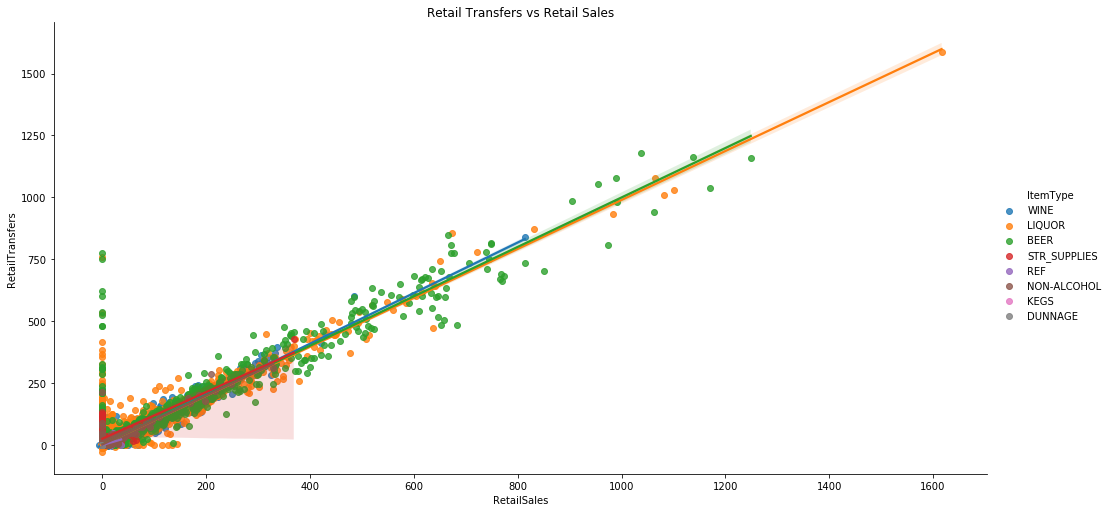

In [63]:
sns.lmplot(x='RetailSales', y='RetailTransfers', data=data, hue='ItemType',
          height=7, aspect=2)
plt.title('Retail Transfers vs Retail Sales', fontweight=500)
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

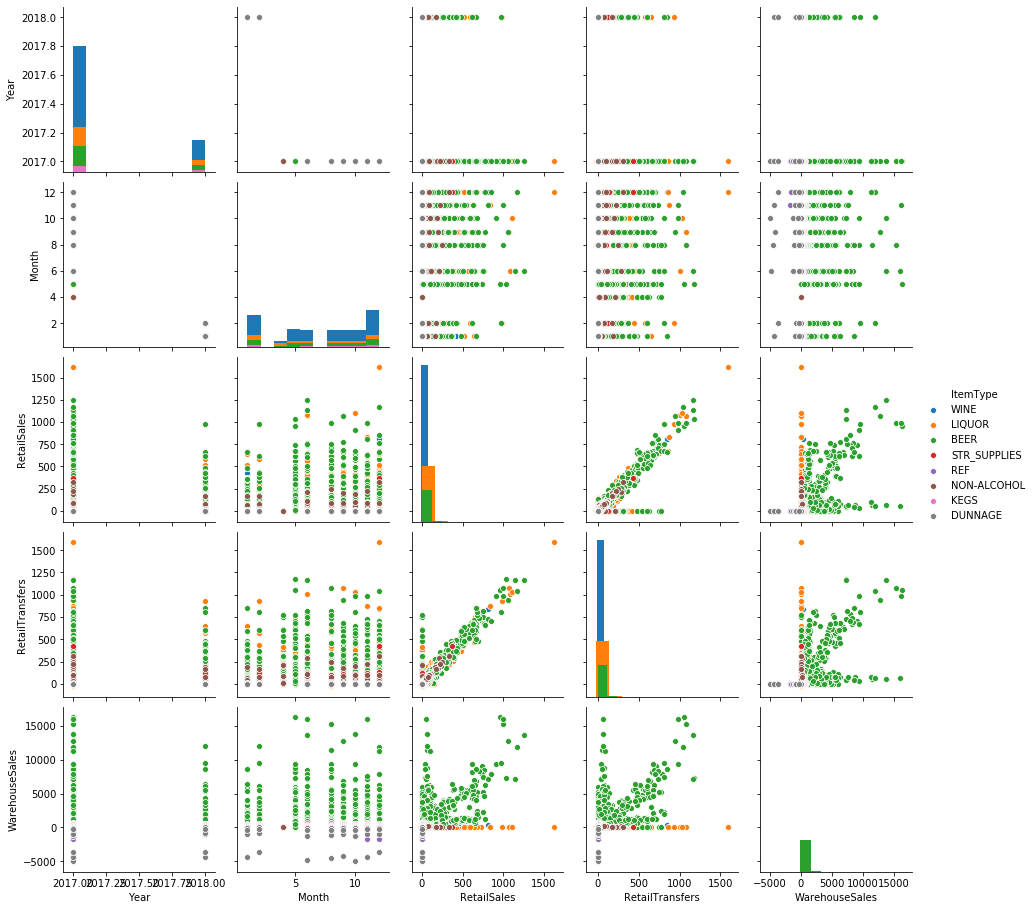

In [70]:
# diag_kind = Auto returns error since sns 10.0 because KDE = 0 - setting diag_kind to 'hist' to avoid error message
sns.pairplot(data=data, hue='ItemType', diag_kind='hist')
plt.show()